# Univariate Interpolation 

In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import splrep, splev

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### with scipy.interpolate import interp1d

In [5]:
years      = range(1900, 2000,10)
population = [76.094, 92.407, 106.461, 123.077, 132.122, 152.271, 180.671, 205.052, 227.224, 249.464]
print (len(years))
print (len(population))
f = interp1d(years, population)
print (f.x)
print (f.y)

10
10
[1900 1910 1920 1930 1940 1950 1960 1970 1980 1990]
[ 76.094  92.407 106.461 123.077 132.122 152.271 180.671 205.052 227.224
 249.464]


### from scipy.interpolate import splrep, splev

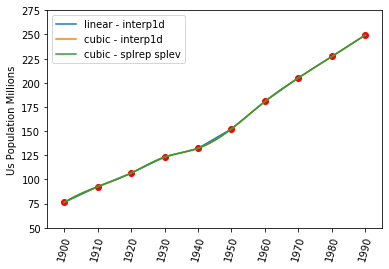

In [6]:
x = np.linspace(1900, 1990, 100)

yy        = f(x)
f_linear  = interp1d(years, population)
f_cubic   = interp1d(years, population, kind='cubic')

def f_cubic2(x1, years, population):
    ret = splrep(years, population)
    return splev(x1, ret)

plt.scatter(years, population, color = 'red')
plt.plot(x, f_linear(x), label='linear - interp1d')
plt.plot(x, f_cubic(x), label='cubic - interp1d')
plt.plot(x, f_cubic2(x, years, population), label='cubic - splrep splev')
plt.legend(loc="upper left")
plt.axis([1895, 1995, 50, 275])        
plt.xticks(range(1900, 1995, 10), rotation = 75)        
plt.ylabel("Us Population Millions") 
plt.show()

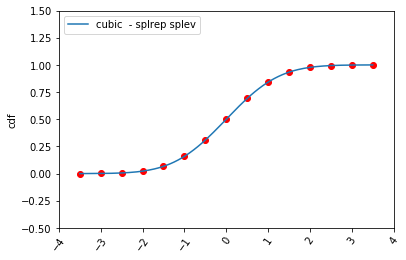

In [8]:
# Let's practise on the normal distribution
import scipy.stats as ss
xvals = np.linspace(-3.5, 3.5, 15)
yvals = ss.norm(0,1).cdf(xvals)
#print xvals
#print yvals

def f_cubic2(x, x1, y1):
    ret = splrep(x1, y1)
    return splev(x, ret)

xx = np.linspace(-3.5, 3.5, 150)

plt.scatter(xvals, yvals, color = 'red')
plt.plot(xx, f_cubic2(xx,  xvals, yvals), label='cubic  - splrep splev')
plt.legend(loc="upper left")
plt.axis([-4, 4, -0.5, 1.5])        
plt.xticks(range(-4, 5, 1), rotation = 55)        
plt.ylabel("cdf") 
plt.show()